<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
from util import *

In [15]:
dist0 = []
dist1 = []
dist2 = []
dist3 = []
dist4 = []
dist5 = []
max0 = []
max1 = []
max2 = []
max3 = []
max4 = []
max5 = []
for seed in range(10):
    sensors, clients, distances = init_nodes_and_distance_matrix(seed)
    
    tmp = np.zeros_like(distances)
    tmp[distances<=50] = 1
    tmp = np.sum(tmp, axis=0)
    maxxxx = np.sum(tmp>=3)
    
    connection_matrix, num_of_success_clients =  greedy_direct(sensors, clients, distances)
    dist0.append(maxxxx - num_of_success_clients)
    max0.append(num_of_success_clients)
    connection_matrix, num_of_success_clients =  greedy_most_near(sensors, clients, distances)
    dist1.append(maxxxx - num_of_success_clients)
    max1.append(num_of_success_clients)
    maxiter = 100
    SIZE = 20
    connection_matrix, num_of_success_clients, RankRec =  GA(sensors, clients, distances,maxiter,SIZE)
    dist2.append(maxxxx - RankRec[-1])
    max2.append(RankRec[-1])
    maxiter = 100
    SIZE = 40
    connection_matrix, num_of_success_clients, RankRec =  GA(sensors, clients, distances,maxiter,SIZE)
    dist3.append(maxxxx - RankRec[-1])
    max3.append(RankRec[-1])
    maxiter = 200
    SIZE = 80
    connection_matrix, num_of_success_clients, RankRec =  GA(sensors, clients, distances,maxiter,SIZE)
    dist4.append(maxxxx - RankRec[-1])
    max4.append(RankRec[-1])
    connection_matrix, num_of_success_clients =  max_flow(sensors, clients, distances)
    dist5.append(maxxxx - num_of_success_clients)
    max5.append(num_of_success_clients)


In [9]:
import pandas as pd

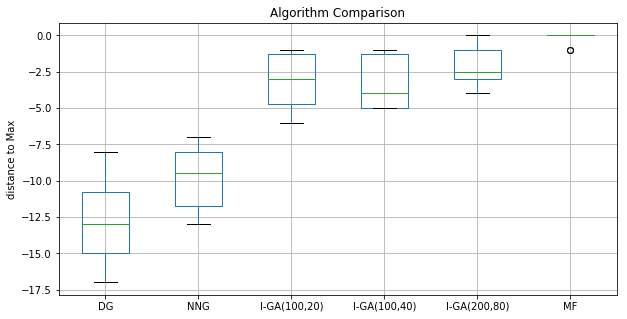

In [16]:
plt.figure(figsize=(10,5))
data = pd.DataFrame({'DG':-np.array(dist0),
                    'NNG':-np.array(dist1),
                    'I-GA(100,20)':-np.array(dist2),
                    'I-GA(100,40)':-np.array(dist3),
                    'I-GA(200,80)':-np.array(dist4),
                    'MF':-np.array(dist5)})
plt.ylabel('distance to Max')
plt.title('Algorithm Comparison')
data.boxplot(['DG','NNG','I-GA(100,20)','I-GA(100,40)','I-GA(200,80)','MF'])

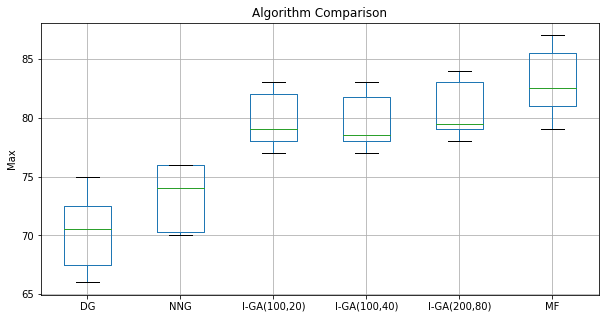

In [18]:
plt.figure(figsize=(10,5))
data = pd.DataFrame({'DG':np.array(max0),
                    'NNG':np.array(max1),
                    'I-GA(100,20)':np.array(max2),
                    'I-GA(100,40)':np.array(max3),
                    'I-GA(200,80)':np.array(max4),
                    'MF':np.array(max5)})
plt.ylabel('Max')
plt.title('Algorithm Comparison')
data.boxplot(['DG','NNG','I-GA(100,20)','I-GA(100,40)','I-GA(200,80)','MF'])

Text(0.5,1,'Algorithm Comparison')

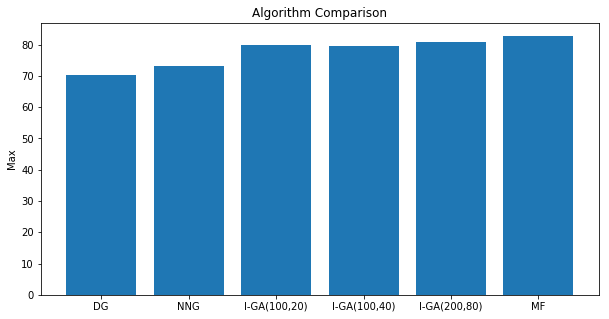

In [20]:
plt.figure(figsize=(10,5))
plt.bar(['DG','NNG','I-GA(100,20)','I-GA(100,40)','I-GA(200,80)','MF'],[np.mean(max0),np.mean(max1),np.mean(max2),\
                                                                       np.mean(max3),np.mean(max4),np.mean(max5)])
# data = pd.DataFrame({'DG':-np.array(dist0),
#                     'NNG':-np.array(dist1),
#                     'I-GA(100,20)':-np.array(dist2),
#                     'I-GA(100,40)':-np.array(dist3),
#                     'I-GA(200,80)':-np.array(dist4),
#                     'MF':-np.array(dist5)})
plt.ylabel('Max')
plt.title('Algorithm Comparison')
# data.boxplot(['DG','NNG','I-GA(100,20)','I-GA(100,40)','I-GA(200,80)','MF'])

In [14]:
%%time
maxiter = 200
SIZE = 80
connection_matrix, num_of_success_clients, RankRec =  GA(sensors, clients, distances,maxiter,SIZE)

# connection_matrix, num_of_success_clients =  max_flow(sensors, clients, distances)

Wall time: 2.09 s


In [15]:
RankRec[-1]

79

In [16]:
%%time
connection_matrix, num_of_success_clients =  max_flow(sensors, clients, distances)

Wall time: 2.38 s


In [17]:
num_of_success_clients

81